Setup: Install and import libraries

In [ ]:
!pip install --upgrade gensim scikit-learn plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim.downloader as api
import plotly.express as px
import os
import time

## 1.Load pretrained embeddings


In [ ]:
print("pretrained embeddings:glove-wiki-gigaword-50")
model = api.load("glove-wiki-gigaword-50")  # pretrained 50d embeddings
print(f"Loaded model. Vocab size: {len(model.index_to_key)}")

pretrained embeddings:glove-wiki-gigaword-50
[==================================================] 100.0% 66.0/66.0MB downloaded
Loaded model. Vocab size: 400000


### Lấy vector của một từ

In [ ]:

word_vector = model['python']
print(f"Vector của từ 'python':\n{word_vector}")
print(f"Kích thước vector: {len(word_vector)}")

Vector của từ 'python':
[ 0.5897   -0.55043  -1.0106    0.41226   0.57348   0.23464  -0.35773
 -1.78      0.10745   0.74913   0.45013   1.0351    0.48348   0.47954
  0.51908  -0.15053   0.32474   1.0789   -0.90894   0.42943  -0.56388
  0.69961   0.13501   0.16557  -0.063592  0.35435   0.42819   0.1536
 -0.47018  -1.0935    1.361    -0.80821  -0.674     1.2606    0.29554
  1.0835    0.2444   -1.1877   -0.60203  -0.068315  0.66256   0.45336
 -1.0178    0.68267  -0.20788  -0.73393   1.2597    0.15425  -0.93256
 -0.15025 ]
Kích thước vector: 50


### Tính độ tương đồng (similarity) giữa hai từ

In [ ]:
# Tính độ tương đồng giữa hai từ 'king' và 'queen'
similarity_score = model.similarity('king', 'queen')
print(f"Độ tương đồng giữa 'king' và 'queen': {similarity_score:.4f}")

# Bạn có thể thử với các cặp từ khác
similarity_score_2 = model.similarity('dog', 'cat')
print(f"Độ tương đồng giữa 'dog' và 'cat': {similarity_score_2:.4f}")

similarity_score_3 = model.similarity('car', 'tree')
print(f"Độ tương đồng giữa 'car' và 'tree': {similarity_score_3:.4f}")

### Tìm các từ đồng nghĩa (most similar)

In [ ]:
# Tìm 10 từ tương tự nhất với từ 'happy'
most_similar_words = model.most_similar('happy', topn=10)
print(f"10 từ tương tự nhất với 'happy':")
for word, score in most_similar_words:
    print(f"{word}: {score:.4f}")

# Bạn có thể thử với các từ khác, ví dụ 'vietnam'
most_similar_words_vietnam = model.most_similar('vietnam', topn=10)
print(f"\n10 từ tương tự nhất với 'vietnam':")
for word, score in most_similar_words_vietnam:
    print(f"{word}: {score:.4f}")

##2.Prepare a subset vocabulary and corresponding vectors

In [ ]:
# data too big, do this 4 more easier time

# Sample sizes
num_common = 200   # top frequent-ish words (index_to_key)
num_random = 300   # additional random words
total_samples = num_common + num_random

# Sample word list
common_words = model.index_to_key[:num_common]
random_words = random.sample(model.index_to_key[num_common:], num_random)
words = common_words + random_words
len(words), words[:10]

# Vectors matrix
X = np.array([model[w] for w in words])
print("Vector matrix shape:", X.shape)


Vector matrix shape: (500, 100)


##3.Dimensionality Reduction: PCA (2D and 3D)

In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca2 = pca_2d.fit_transform(X)
print("PCA 2D shape:", X_pca2.shape)

pca_3d = PCA(n_components=3, random_state=42)
X_pca3 = pca_3d.fit_transform(X)
print("PCA 3D shape:", X_pca3.shape)

PCA 2D shape: (500, 2)
PCA 3D shape: (500, 3)


##4.Dimensionality Reduction: t-SNE (2D) and (3D)

- t-SNE is non-linear and often captures local neighborhood structure better.
- It is slower; for 500 points it should be fine. We demonstrate both 2D and 3D.


In [ ]:
tsne_2d = TSNE(n_components=2, perplexity=30, n_iter_without_progress=1000, random_state=42, init='pca')
start = time.time()
X_tsne2 = tsne_2d.fit_transform(X)
print(f"t-SNE 2D done in {time.time() - start:.2f} s")

tsne_3d = TSNE(n_components=3, perplexity=30, n_iter_without_progress=1000, random_state=42, init='pca')
start = time.time()
X_tsne3 = tsne_3d.fit_transform(X)
print(f"t-SNE 3D done in {time.time() - start:.2f} s")

t-SNE 2D done in 4.71 s
t-SNE 3D done in 11.84 s


##5.Visualization:

a) 2D (PCA & t-SNE)

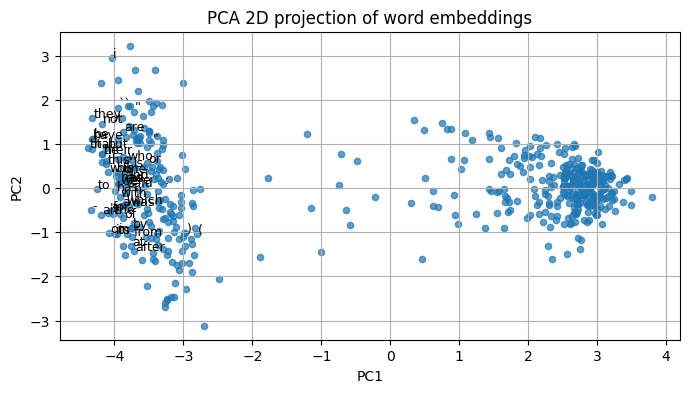

In [ ]:
# common words are shown, random ones aren't
plt.figure(figsize=(8, 4))
plt.scatter(X_pca2[:,0], X_pca2[:,1], alpha=0.7, s=20, label='words')
plt.title('PCA 2D projection of word embeddings')
for i,w in enumerate(words[:50]):  # label first 50 words for readability
    plt.text(X_pca2[i,0]+0.02, X_pca2[i,1]+0.02, w, fontsize=9)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.grid(True)
plt.show()

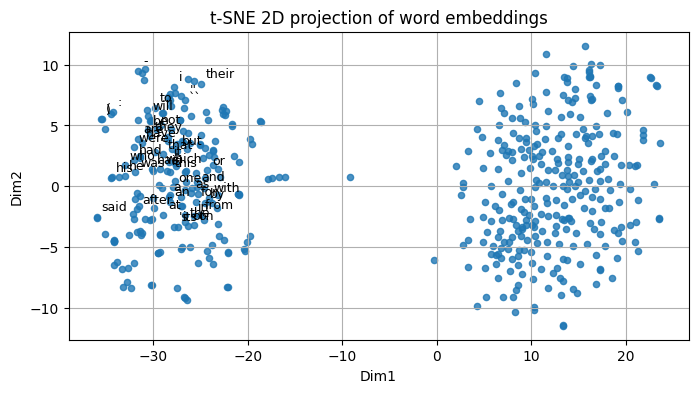

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X_tsne2[:,0], X_tsne2[:,1], alpha=0.8, s=20)
plt.title('t-SNE 2D projection of word embeddings')
for i,w in enumerate(words[:50]):
    plt.text(X_tsne2[i,0]+0.5, X_tsne2[i,1]+0.5, w, fontsize=9)
plt.xlabel('Dim1'); plt.ylabel('Dim2')
plt.grid(True)
plt.show()

b) 3D (PCA & t-SNE)

In [ ]:
df_pca3 = pd.DataFrame(X_pca3, columns=['x','y','z'])
df_pca3['word'] = words
df_pca3['type'] = ['common' if i < num_common else 'random' for i in range(len(words))]

fig_pca3 = px.scatter_3d(df_pca3, x='x', y='y', z='z', color='type', title='PCA 3D of word embeddings')
fig_pca3.update_traces(marker=dict(size=3))
fig_pca3.show()

In [ ]:
df_tsne3 = pd.DataFrame(X_tsne3, columns=['x','y','z'])
df_tsne3['word'] = words
df_tsne3['type'] = ['common' if i < num_common else 'random' for i in range(len(words))]

fig_tsne3 = px.scatter_3d(df_tsne3, x='x', y='y', z='z', color='type', title='t-SNE 3D of word embeddings')
fig_tsne3.update_traces(marker=dict(size=3))
fig_tsne3.show()

##6.Similarity Search:

In [ ]:
# use gensim's built-in similarity
query_word = random.choice(words)
top_k = 10
print("Query word:", query_word)
print(f"Top {top_k} most similar words (gensim):")
sim_list = model.most_similar(query_word, topn=top_k)
for w,score in sim_list:
    print(f"{w}\t{score:.4f}")

Query word: work
Top 10 most similar words (gensim):
working	0.8774
works	0.8548
well	0.8274
worked	0.8128
done	0.8112
so	0.7680
way	0.7633
how	0.7614
this	0.7587
and	0.7481


In [ ]:
if query_word in words:
    q_idx = words.index(query_word)
    q_pca2 = X_pca2[q_idx]
    q_tsne2 = X_tsne2[q_idx]
    # Cosine similarity helpers
    def cos_sim(a,b):
        denom = (np.linalg.norm(a) * np.linalg.norm(b))
        return (np.dot(a,b)/denom) if denom != 0 else 0.0

    # compute similarities in PCA 2D space
    sims_pca2 = [(words[i], cos_sim(q_pca2, X_pca2[i])) for i in range(len(words))]
    sims_pca2 = sorted(sims_pca2, key=lambda x: -x[1])[1:top_k+1]  # exclude self
    print("\nTop similar by PCA 2D (sampled vocab):")
    for w,s in sims_pca2:
        print(f"{w}\t{s:.4f}")

    # compute similarities in t-SNE 2D space
    sims_tsne2 = [(words[i], cos_sim(q_tsne2, X_tsne2[i])) for i in range(len(words))]
    sims_tsne2 = sorted(sims_tsne2, key=lambda x: -x[1])[1:top_k+1]
    print("\nTop similar by t-SNE 2D (sampled vocab):")
    for w,s in sims_tsne2:
        print(f"{w}\t{s:.4f}")
else:
    print("Query word not in sampled vocabulary; skip reduced-space similarity check.")



Top similar by PCA 2D (sampled vocab):
many	1.0000
still	1.0000
just	1.0000
be	1.0000
have	0.9999
could	0.9999
any	0.9999
used	0.9999
all	0.9998
"	0.9997

Top similar by t-SNE 2D (sampled vocab):
work	1.0000
is	1.0000
nursing	1.0000
has	1.0000
also	1.0000
this	1.0000
k-12	1.0000
city	1.0000
which	1.0000
school	1.0000


##7.Comments

Dựa trên các kết quả đã chạy:

1.  **Giảm chiều dữ liệu bằng:**
    *   **PCA:** Giúp nhìn thấy bức tranh tổng thể về mối quan hệ giữa các từ. Tuy nhiên, các từ có nghĩa gần nhau có thể vẫn nằm khá xa nhau trên biểu đồ 2D/3D.
    *   **t-SNE:** Thường tạo ra các nhóm từ chặt chẽ hơn cho những từ có nghĩa gần nhau. t-SNE tốt hơn trong việc hiển thị cấu trúc cục bộ (các từ hàng xóm gần nhau).

2.  **Trực quan hóa 2D và 3D:**
    *   Các biểu đồ giúp chúng ta "nhìn" được mối quan hệ giữa các từ trong không gian nhúng.
    *   Biểu đồ 3D (sử dụng Plotly) cho phép xoay và tương tác, giúp khám phá cấu trúc dữ liệu tốt hơn khi các nhóm từ không thể tách rời hoàn toàn trong không gian 2D.
    *   Việc chỉ hiển thị một số từ phổ biến/ngẫu nhiên giúp biểu đồ không bị quá tải và dễ nhìn hơn.

3.  **Tìm kiếm từ tương tự:**
    *   Khi tìm kiếm các từ tương tự bằng mô hình gốc (gensim), kết quả thường rất chính xác về mặt ngữ nghĩa (ví dụ: tìm từ giống "work" ra "working", "works", "worked").
    *   Khi tìm kiếm từ tương tự trong không gian đã giảm chiều (PCA 2D, t-SNE 2D), kết quả có thể không chính xác bằng mô hình gốc. Điều này cho thấy việc giảm chiều dữ liệu xuống 2D/3D đã làm mất đi một phần thông tin về mối quan hệ giữa các từ.
    *   Kết quả tìm kiếm tương tự trong t-SNE 2D có vẻ "giống" với mô hình gốc hơn so với PCA 2D, điều này phù hợp với nhận xét rằng t-SNE bảo toàn cấu trúc cục bộ tốt hơn.

**Tóm lại:**

*   PCA và t-SNE là những công cụ hữu ích để hình dung dữ liệu nhúng từ (word embeddings).
*   t-SNE thường tốt hơn cho việc xem các từ gần nhau về nghĩa tạo thành nhóm như thế nào.
*   Giảm chiều dữ liệu giúp trực quan hóa nhưng cũng làm mất đi một phần thông tin.
*   Để tìm kiếm từ tương tự chính xác nhất, nên sử dụng không gian nhúng gốc thay vì không gian đã giảm chiều.